<a href="https://colab.research.google.com/github/nevesmarcos42/FraudDetectionProject/blob/main/FraudDetectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Projeto Exemplo de Ciência de Dados**


> Com a biblioteca Sklearn






In [ ]:
# Importação das Biliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Coleta dos dados**

In [ ]:
# Carregamento dos dados e verifica

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto Exemplo de Ciência de Dados/fraud_dataset.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Verifica se existe dados nulos
df.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [ ]:
# Dimensão dos dados
df.shape

(1000000, 8)

**Verificação de desequilibrio de classe - fraud**

In [ ]:
round(df['fraud'].value_counts(normalize=True)*100, 2) # nomalize=True faz uma representação de percentual

,proportion
fraud,
0.0,91.26
1.0,8.74


**Padronização**

In [ ]:
# Metodo de Holdout - Train 80% x Test 20%
from sklearn.model_selection import train_test_split

X = df.drop('fraud', axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(800000, 7) (200000, 7)
(800000,) (200000,)


In [ ]:
# Aplica a padronização
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_staggered = scaler.transform(X_train)
X_test_staggered = scaler.transform(X_test)

In [ ]:
# Aplica o oversampling

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42) # Aplica a estrateja de equilibrio
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_staggered, y_train)

print(pd.Series(y_train_resampled).value_counts(normalize=True)*100)

fraud
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


**Treinamento do modelo**

In [ ]:
# Regressão logistica e validação cruzada
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = LogisticRegression(penalty='l2') # Penalty='l2' é a regularização para fugir do cenario de overfitting

# Validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='roc_auc')

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

print('AUC:', scores.mean())

AUC: 0.9793964360941153


In [ ]:
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_staggered)

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



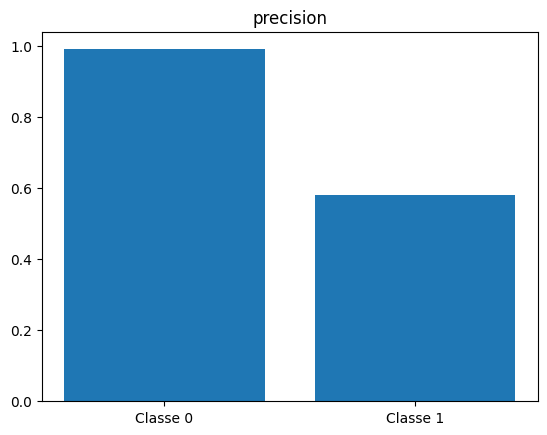

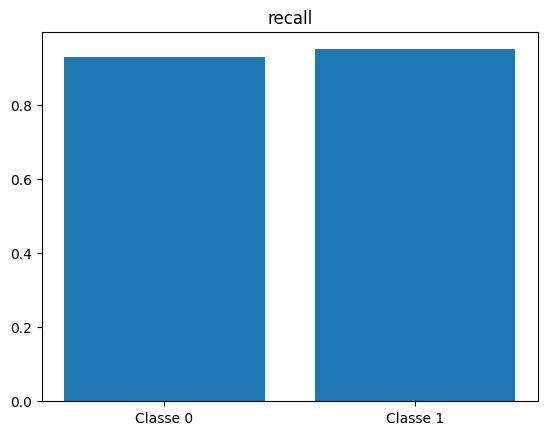

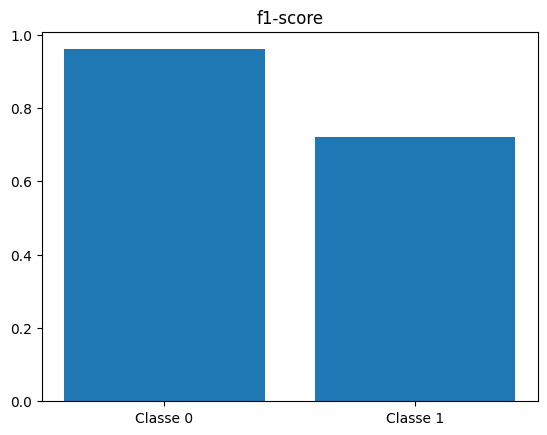

AUC: 0.9408199126613486


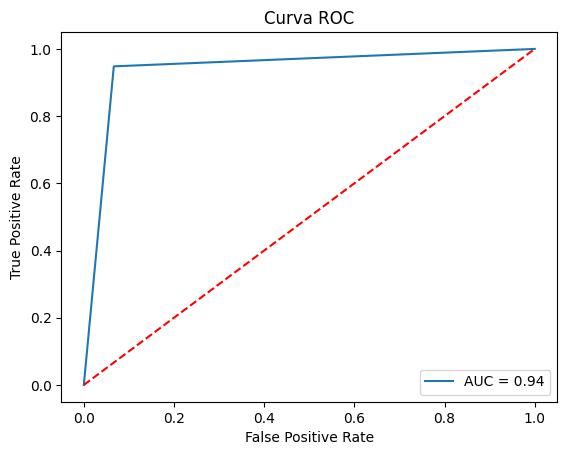

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

auc_score = roc_auc_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
metrics = {
    'precision': [0.99, 0.58],
    'recall': [0.93, 0.95],
    'f1-score': [0.96, 0.72]
}
classes = ['Classe 0', 'Classe 1']
for metric, values in metrics.items():
    plt.bar(classes, values)
    plt.title(metric)
    plt.show()

print('AUC:', auc_score.mean())

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()



# Conclusão:



> O modelo apresenta um bom desempenho geral, com destaque para o alto recall na classe de fraude (1). Isso é especialmente relevante em cenários onde capturar fraudes é prioridade, mesmo ao custo de alguns falsos positivos. Contudo, há espaço para melhorias na precisão da classe de fraude, talvez com a otimização de hiperparâmetros ou métodos adicionais de reamostragem.








